## **Submision 1 Machine Learning Terapan Nicholas Doloksaribu**

## Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Penjelasan: Library ini digunakan untuk proses analisis data dan pengembangan model machine learning. Pandas dan NumPy menangani manipulasi data, Matplotlib serta Seaborn digunakan untuk visualisasi, sedangkan Scikit-learn menyediakan modul untuk pemodelan dan evaluasi.

## Membaca dan Mengeksplorasi Dataset

In [4]:
df = pd.read_csv('obesity_data.csv')
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


Penjelasan: Membaca data dari file CSV "obesity_data.csv" menggunakan Pandas dan menyimpannya dalam DataFrame bernama df. df.head() menampilkan 5 baris pertama data, yang menunjukkan kolom-kolom seperti 'Gender', 'Age', 'Height', 'Weight', dan 'BMI', serta beberapa kolom lainnya yang berhubungan dengan kebiasaan dan kondisi fisik individu.

## Informasi Data

In [5]:
print("Jumlah baris dan kolom:", df.shape)
df.info()

Jumlah baris dan kolom: (1000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


Penjelasan: Menampilkan informasi dasar tentang DataFrame. df.shape menunjukkan data memiliki 1000 baris dan 7 kolom. df.info() memberikan informasi detail seperti tipe data setiap kolom (misalnya, float64, int64, object), jumlah data non-null di setiap kolom (semuanya 1000, menunjukkan tidak ada missing values), dan penggunaan memori.

In [6]:
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat: {duplicate_rows.shape[0]}")

Jumlah baris duplikat: 0


Penjelasan : Mengecek apakah ada data yang hilang (missing values) di setiap kolom DataFrame. Output menunjukkan bahwa semua kolom memiliki 0 missing values, yang berarti dataset lengkap.

In [7]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)].index.tolist()

outliers = set(detect_outliers_iqr(df['Age']) +
               detect_outliers_iqr(df['Height']) +
               detect_outliers_iqr(df['Weight']) +
               detect_outliers_iqr(df['BMI']))
print(f"Jumlah outlier: {len(outliers)}")

Jumlah outlier: 26


Penjelasan : Tidak ditemukan data duplikat, yang menunjukkan kualitas data cukup baik. Terdapat 26 outlier, kemungkinan besar berasal dari individu dengan kondisi obesitas ekstrem. Outlier ini tetap digunakan karena mereka merepresentasikan variasi yang relevan dalam konteks obesitas dan penting untuk akurasi model.

## Visualisasi Data

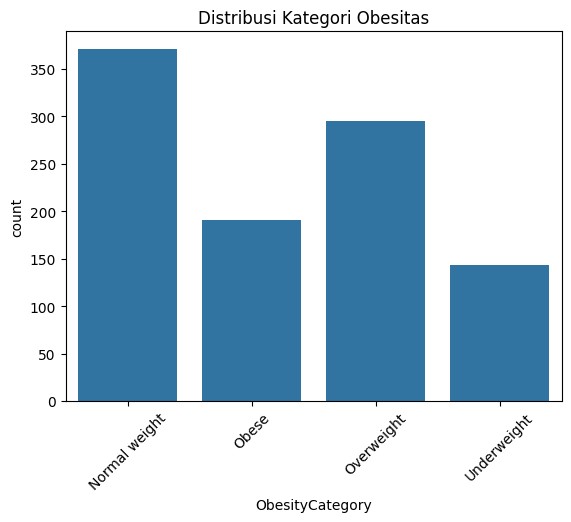

In [8]:
sns.countplot(x='ObesityCategory', data=df)
plt.title("Distribusi Kategori Obesitas")
plt.xticks(rotation=45)
plt.show()

Penjelasan : Distribusi kategori menunjukkan ketimpangan data — kategori Normal weight dan Overweight mendominasi. Ketidakseimbangan kelas seperti ini penting diperhatikan karena dapat memengaruhi performa model, terutama pada kelas minoritas seperti Underweight.

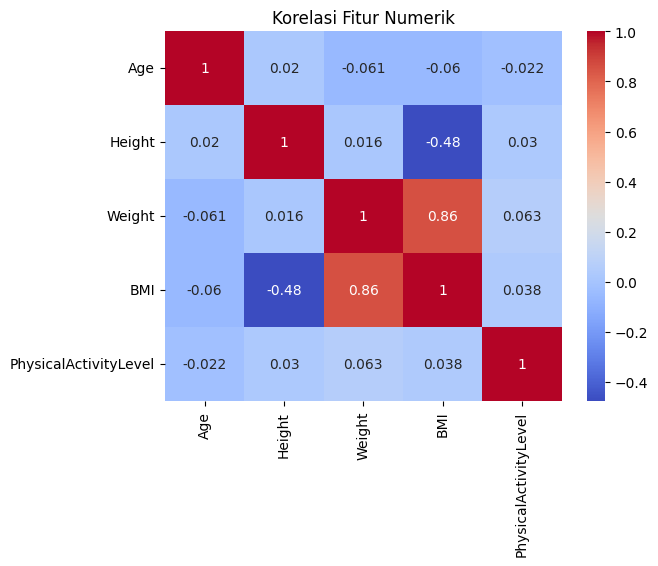

In [9]:
df_corr = df.drop(columns=['Gender', 'ObesityCategory']).corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur Numerik")
plt.show()

Penjelasan : Korelasi tinggi antara Weight dan BMI menegaskan bahwa kedua variabel ini saling berkaitan secara langsung. Sebaliknya, PhysicalActivityLevel menunjukkan korelasi yang lebih lemah dengan BMI, mengindikasikan bahwa obesitas tidak hanya dipengaruhi oleh aktivitas fisik tetapi juga faktor lain seperti genetika dan pola makan.

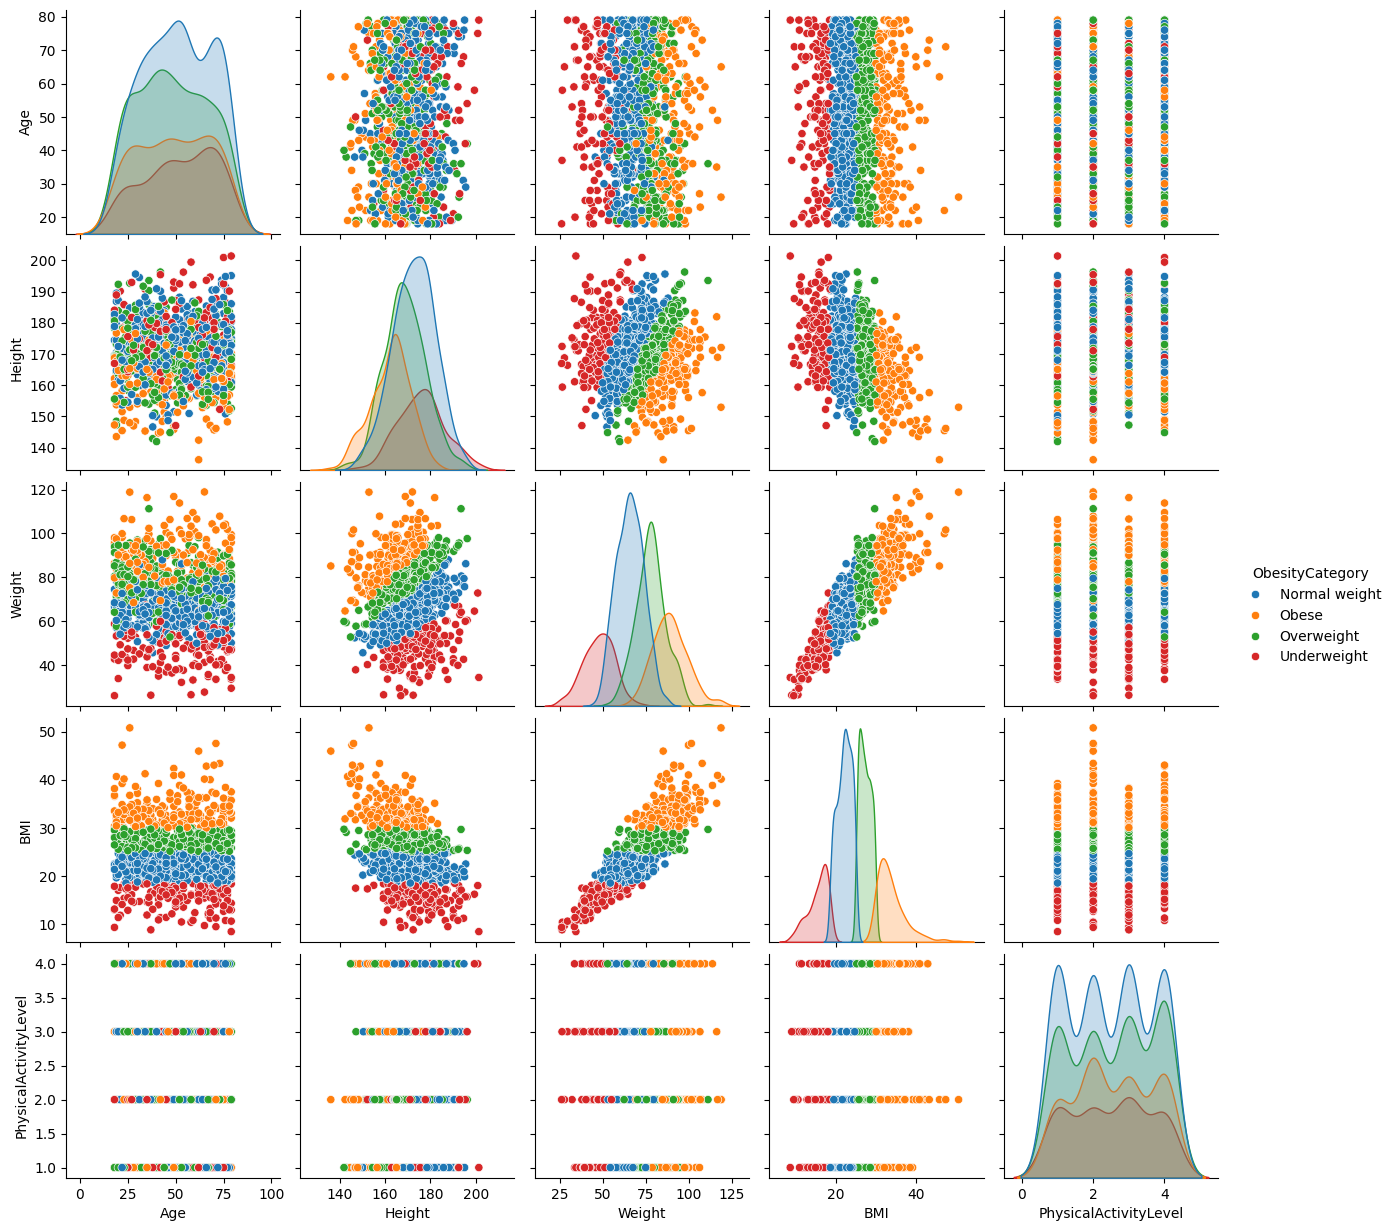

In [10]:
sns.pairplot(df, vars=['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel'], hue='ObesityCategory')
plt.show()

Penjelasan: Membuat pair plot untuk memvisualisasikan hubungan antara beberapa fitur numerik dan kategori obesitas. Dari plot, kita bisa melihat bagaimana fitur-fitur seperti 'Age', 'Height', 'Weight', 'BMI', dan 'PhysicalActivityLevel' bervariasi di setiap kategori obesitas. Misalnya, terlihat bahwa individu dengan 'Weight' dan 'BMI' yang lebih tinggi cenderung berada di kategori obesitas yang lebih tinggi.

In [11]:
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_target = LabelEncoder()
df['ObesityCategory'] = le_target.fit_transform(df['ObesityCategory'])

X = df.drop('ObesityCategory', axis=1)
y = df['ObesityCategory']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Penjelasan : Encoding label memungkinkan algoritma machine learning memahami data kategorikal. Standardisasi data dengan StandardScaler juga sangat penting agar model seperti SVM dan Logistic Regression tidak bias terhadap fitur dengan skala besar. Pembagian data dilakukan secara stratified untuk menjaga proporsi kelas, membantu mencegah bias evaluasi.

In [12]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Support Vector Machine
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

Penjelasan: Melatih tiga model machine learning: Logistic Regression, Random Forest, dan SVM. Data latih digunakan untuk melatih model, dan predict() digunakan untuk membuat prediksi pada data uji.

- Logistic Regression cepat dan interpretatif, cocok sebagai baseline.

- Random Forest sangat akurat dan mampu menangani fitur non-linear.

- SVM andal pada dataset kecil dan terstandarisasi, tetapi bisa kurang optimal pada dataset tidak seimbang.

In [13]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"=== {model_name} ===")
    print(classification_report(y_true, y_pred, target_names=le_target.classes_))
    print("Akurasi:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")

=== Logistic Regression ===
               precision    recall  f1-score   support

Normal weight       0.94      1.00      0.97        74
        Obese       1.00      0.97      0.99        38
   Overweight       0.98      0.97      0.97        59
  Underweight       1.00      0.90      0.95        29

     accuracy                           0.97       200
    macro avg       0.98      0.96      0.97       200
 weighted avg       0.97      0.97      0.97       200

Akurasi: 0.97
Confusion Matrix:
 [[74  0  0  0]
 [ 0 37  1  0]
 [ 2  0 57  0]
 [ 3  0  0 26]]


=== Random Forest ===
               precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00        74
        Obese       1.00      0.97      0.99        38
   Overweight       0.98      1.00      0.99        59
  Underweight       1.00      1.00      1.00        29

     accuracy                           0.99       200
    macro avg       1.00      0.99      0.99       200
 weighted avg       1.00

Penjelasan:
- Random Forest mencatat performa terbaik dengan akurasi 99.5% dan f1-score yang tinggi di semua kelas. Ini menunjukkan bahwa model sangat baik dalam membedakan kategori obesitas.

- Logistic Regression cukup baik (97%) dan bisa digunakan jika interpretabilitas lebih diutamakan.

- SVM sedikit tertinggal (93%), terutama karena kesulitan membedakan kelas minoritas seperti Underweight, menunjukkan potensi overfitting pada kelas mayoritas.